In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import dataset into pandas dataframe
df= pd.read_csv(r"C:\Users\DELL E6400\Downloads\burlington_2020.csv")
df.head()


,raw_row_number,date,time,location,lat,lng,subject_age,subject_race,subject_sex,department_name,...,contraband_found,search_conducted,search_basis,reason_for_search,reason_for_stop,vehicle_registration_state,raw_race,raw_gender,raw_contraband_evidence,raw_outcome_of_stop
0,5223,2012-10-10,00:46:00,"North Ave at Convent Sq, Burlington, VT",44.488673,-73.225712,55.0,white,male,Burlington Police Department,...,NaN,False,NaN,NaN,M = Moving violation,NaN,White,Male - M,X = Not applicable / no search,W = Warning
1,5224,2012-10-10,00:57:00,"North St at N Winooski Ave, Burlington, VT",44.484809,-73.211471,22.0,white,male,Burlington Police Department,...,NaN,False,NaN,NaN,V = Vehicle equipment,NH,White,Male - M,X = Not applicable / no search,W = Warning
2,5225,2012-10-10,01:01:00,"North Ave at North St, Burlington, VT",44.484429,-73.222334,45.0,white,male,Burlington Police Department,...,NaN,False,NaN,NaN,M = Moving violation,NaN,White,Male - M,X = Not applicable / no search,T = Ticket
3,5226,2012-10-10,01:32:00,"North Ave at Rt 127 exit, Burlington, VT, 05408",NaN,NaN,27.0,white,male,Burlington Police Department,...,NaN,False,NaN,NaN,M = Moving violation,NaN,White,Male - M,X = Not applicable / no search,W = Warning
4,5227,2012-10-10,02:31:00,"Main St at Summit St, Burlington, VT",44.476286,-73.202400,26.0,white,female,Burlington Police Department,...,NaN,False,NaN,NaN,V = Vehicle equipment,NJ,White,Female - F,X = Not applicable / no search,W = Warning


In [93]:
#drop unwanted rows with NaN values

df.dropna(axis = 0)

print(df.isnull().sum())

df.head()


raw_row_number                    0
date                              0
time                              0
location                          0
lat                             407
lng                             407
subject_age                     622
subject_race                   1062
subject_sex                     796
department_name                   0
type                              0
violation                         2
arrest_made                     269
citation_issued                 269
warning_issued                  269
outcome                         281
contraband_found              31124
search_conducted                  0
search_basis                  31124
reason_for_search             31124
reason_for_stop                 418
vehicle_registration_state    26002
raw_race                       1040
raw_gender                      783
raw_contraband_evidence         449
raw_outcome_of_stop             269
dtype: int64


,raw_row_number,date,time,location,lat,lng,subject_age,subject_race,subject_sex,department_name,...,contraband_found,search_conducted,search_basis,reason_for_search,reason_for_stop,vehicle_registration_state,raw_race,raw_gender,raw_contraband_evidence,raw_outcome_of_stop
0,5223,2012-10-10,00:46:00,"North Ave at Convent Sq, Burlington, VT",44.488673,-73.225712,55.0,white,male,Burlington Police Department,...,NaN,False,NaN,NaN,M = Moving violation,NaN,White,Male - M,X = Not applicable / no search,W = Warning
1,5224,2012-10-10,00:57:00,"North St at N Winooski Ave, Burlington, VT",44.484809,-73.211471,22.0,white,male,Burlington Police Department,...,NaN,False,NaN,NaN,V = Vehicle equipment,NH,White,Male - M,X = Not applicable / no search,W = Warning
2,5225,2012-10-10,01:01:00,"North Ave at North St, Burlington, VT",44.484429,-73.222334,45.0,white,male,Burlington Police Department,...,NaN,False,NaN,NaN,M = Moving violation,NaN,White,Male - M,X = Not applicable / no search,T = Ticket
3,5226,2012-10-10,01:32:00,"North Ave at Rt 127 exit, Burlington, VT, 05408",NaN,NaN,27.0,white,male,Burlington Police Department,...,NaN,False,NaN,NaN,M = Moving violation,NaN,White,Male - M,X = Not applicable / no search,W = Warning
4,5227,2012-10-10,02:31:00,"Main St at Summit St, Burlington, VT",44.476286,-73.202400,26.0,white,female,Burlington Police Department,...,NaN,False,NaN,NaN,V = Vehicle equipment,NJ,White,Female - F,X = Not applicable / no search,W = Warning


In [94]:
#find duplicate values if any

duplicates = df.duplicated()

df[duplicates]

,raw_row_number,date,time,location,lat,lng,subject_age,subject_race,subject_sex,department_name,...,contraband_found,search_conducted,search_basis,reason_for_search,reason_for_stop,vehicle_registration_state,raw_race,raw_gender,raw_contraband_evidence,raw_outcome_of_stop


In [95]:
#change column type to boolean
df['arrest_made'] = df['arrest_made'].astype('bool')
df['citation_issued'] = df['citation_issued'].astype('bool')


#create date-time index
combined = df['date'].str.cat(df['time'], sep=' ')
df['date_and_time'] = pd.to_datetime(combined)
df.set_index('date_and_time', inplace=True)
df.head()

,raw_row_number,date,time,location,lat,lng,subject_age,subject_race,subject_sex,department_name,...,contraband_found,search_conducted,search_basis,reason_for_search,reason_for_stop,vehicle_registration_state,raw_race,raw_gender,raw_contraband_evidence,raw_outcome_of_stop
date_and_time,,,,,,,,,,,,,,,,,,,,,
2012-10-10 00:46:00,5223,2012-10-10,00:46:00,"North Ave at Convent Sq, Burlington, VT",44.488673,-73.225712,55.0,white,male,Burlington Police Department,...,NaN,False,NaN,NaN,M = Moving violation,NaN,White,Male - M,X = Not applicable / no search,W = Warning
2012-10-10 00:57:00,5224,2012-10-10,00:57:00,"North St at N Winooski Ave, Burlington, VT",44.484809,-73.211471,22.0,white,male,Burlington Police Department,...,NaN,False,NaN,NaN,V = Vehicle equipment,NH,White,Male - M,X = Not applicable / no search,W = Warning
2012-10-10 01:01:00,5225,2012-10-10,01:01:00,"North Ave at North St, Burlington, VT",44.484429,-73.222334,45.0,white,male,Burlington Police Department,...,NaN,False,NaN,NaN,M = Moving violation,NaN,White,Male - M,X = Not applicable / no search,T = Ticket
2012-10-10 01:32:00,5226,2012-10-10,01:32:00,"North Ave at Rt 127 exit, Burlington, VT, 05408",NaN,NaN,27.0,white,male,Burlington Police Department,...,NaN,False,NaN,NaN,M = Moving violation,NaN,White,Male - M,X = Not applicable / no search,W = Warning
2012-10-10 02:31:00,5227,2012-10-10,02:31:00,"Main St at Summit St, Burlington, VT",44.476286,-73.202400,26.0,white,female,Burlington Police Department,...,NaN,False,NaN,NaN,V = Vehicle equipment,NJ,White,Female - F,X = Not applicable / no search,W = Warning


In [96]:
#black males on traffic violations

df['outcome'].value_counts(normalize=True)

black =df[(df['subject_sex'] == 'male') & (df['subject_race'] == 'black')]

black_male_outcome=black.outcome.value_counts(normalize=True)

print(black_male_outcome)

warning     0.599241
citation    0.382321
arrest      0.018438
Name: outcome, dtype: float64


In [97]:
#females on getting citations
female_and_citation = df[(df['subject_sex'] == 'female') & (df['outcome'] == 'citation')]


#males on getting citations
male_and_citation = df[(df['subject_sex'] == 'male') & (df['outcome'] == 'citation')]

In [98]:
#df.groupby('subject_sex').arrest_made.mean()

df.groupby(['subject_sex','subject_race']).arrest_made.sum()

subject_sex  subject_race          
female       asian/pacific islander      5
             black                      10
             hispanic                    1
             other                       8
             white                     149
male         asian/pacific islander     16
             black                      46
             hispanic                    2
             other                       5
             white                     311
Name: arrest_made, dtype: int64

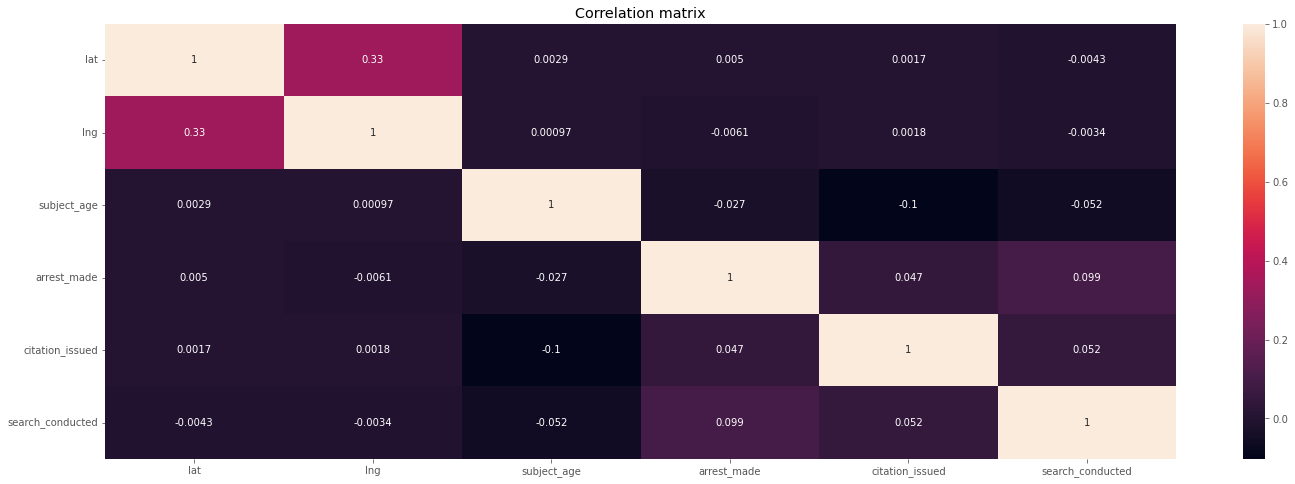

In [105]:
#correlation matrix
plt.figure(figsize=(24, 8))
plt.title('Correlation matrix')
sns.heatmap(df.corr(), annot=True);

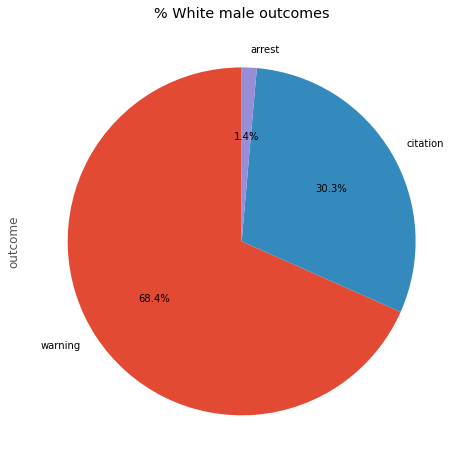

In [100]:
#white males on traffic violations

white = df[(df['subject_sex'] == 'male') & (df['subject_race'] == 'white')]

white_male_outcome=white.outcome.value_counts(normalize=True)

#print(white_male_outcome)

white_male_outcome.plot(kind='pie', startangle = 90,autopct='%1.1f%%',figsize = (16,8))

plt.title('% White male outcomes')

plt.show()

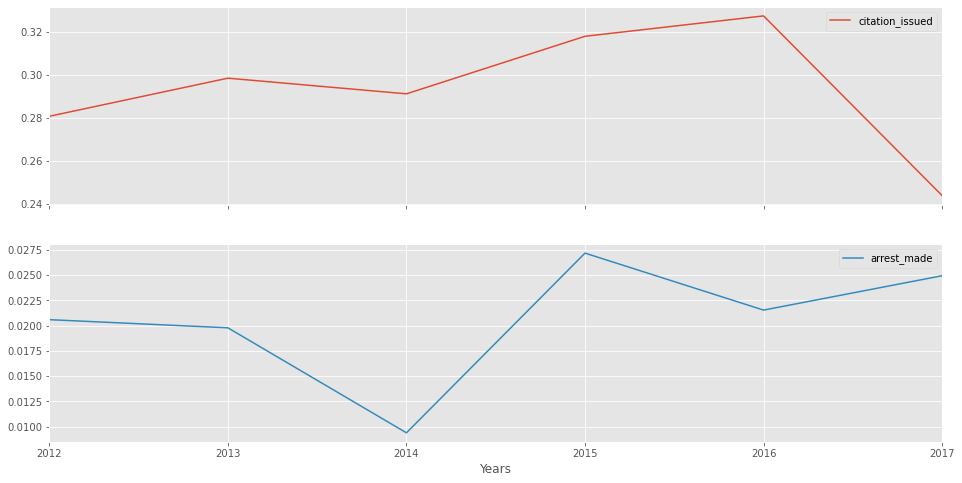

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

#how have citations and arrests trended over time?

annual_citation= df['citation_issued'].resample('Y').mean()


annually = pd.concat([annual_citation, annual_arrest], axis ='columns')

annually.plot(subplots= True,figsize = (16,8))

plt.xlabel('Years')

plt.show()


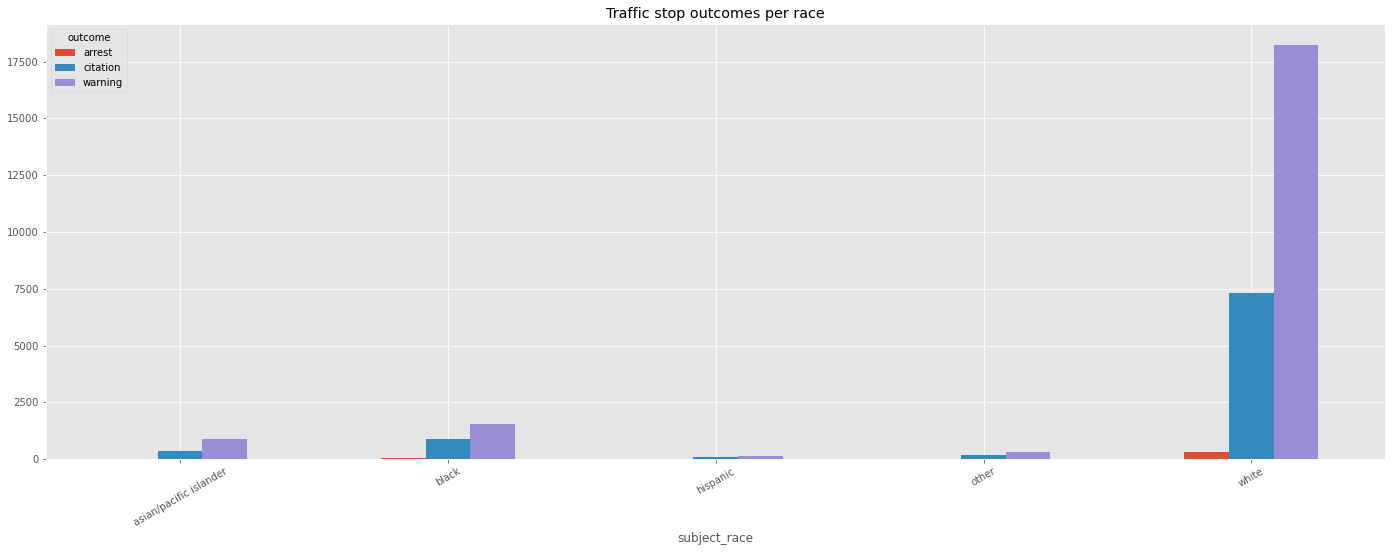

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

table = pd.crosstab(df['subject_race'], df['outcome'])

table.plot(kind='bar',figsize = (24,8))

plt.title('Traffic stop outcomes per race')

plt.xticks(rotation=30)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

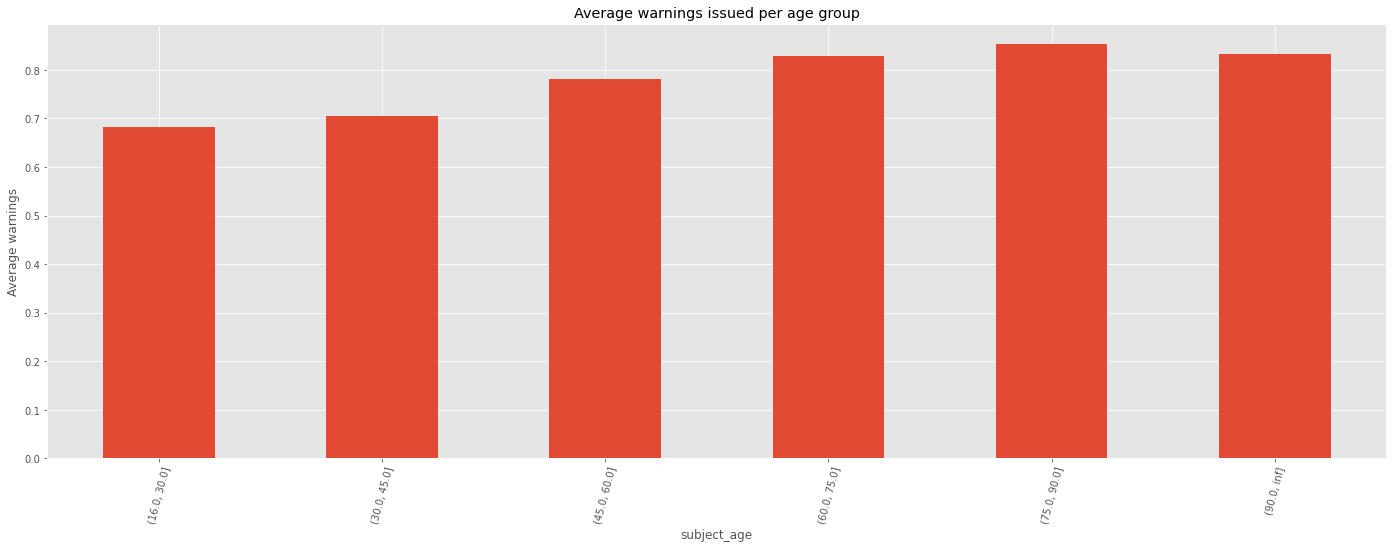

In [103]:
#does age affect if one gets a warning?
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

age_group =pd.cut(df['subject_age'], bins=[16,30,45,60,75,90, np.inf])

age= df.groupby(age_group).warning_issued.mean()

age.plot(kind='bar',figsize = (24,8))

plt.title('Average warnings issued per age group')

plt.ylabel('Average warnings')

plt.xticks(rotation=75)

plt.show
